In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset source
# https://www.kaggle.com/datasets/donw385/horses
df = pd.read_csv("/kaggle/input/horses/horses 2.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (25,26,32,33,38,51,52,53,54,56,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Columns
for col in df.columns:
    print(col)

previous_margin
position
position_again
position_two
margin
bf_odds
bf_odds_two_mins_out
bf_odds_all
vic_tote
vic_tote_two_mins_out
vic_tote_all
nsw_tote
nsw_tote_two_mins_out
nsw_tote_all
nsw_odds
betfair_slope
vic_tote_slope
nsw_tote_slope
nsw_odds_slope
country_code
venue_name
market_id
date
market_name
race_number
condition
weather
runner_id
number
name
runner_name_uuid
barrier
blinkers
emergency
dfs_form_rating
tech_form_rating
total_rating_points
handicap_weight
last_five_starts
penalty
favourite_odds_win
favourite_tote_win
tip_pundit_win
tip_rating_win
tip_12_months_win
tip_recent_win
tip_distance_win
tip_class_win
tip_time_win
tip_overall_win
prize_money
sex
sire
dam
colour
age
jockey
jockey_sex
trainer
form_comment
form_comment_sentiment
last_twenty_starts
class_level
field_strength
days_since_last_run
runs_since_spell
overall_starts
overall_wins
overall_places
track_starts
track_wins
track_places
firm_starts
firm_wins
firm_places
good_starts
good_wins
good_places
dead_starts


In [4]:
# Finding dataset main key - runner_id
for column in df.columns:
    if df[column].nunique() == df[column].count():
        print(f'Unique column - {column}')

Unique column - runner_id


In [5]:
df['overall_wins'].describe()

count    214148.000000
mean          2.083064
std           2.449549
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          36.000000
Name: overall_wins, dtype: float64

GR/BR
BL
GR/B
GR/CH
GR/BL
WH


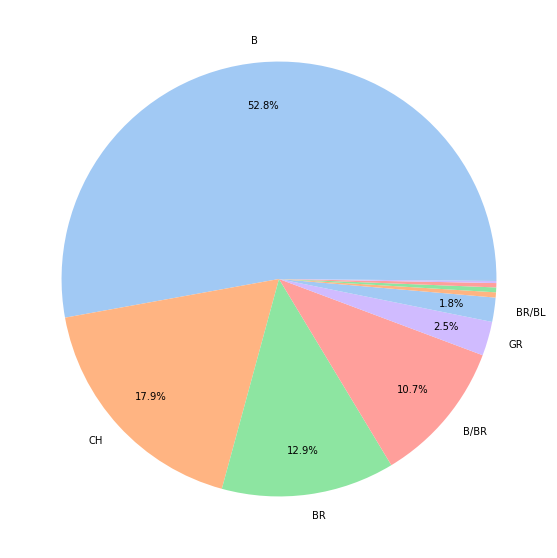

In [6]:
labels = list(df['colour'].value_counts().index)

# When the number of wins is less than 1% the number is not displayed on the plot
for i in range(len(labels)):
    total = int(len(df))
    count = int(len(df.loc[df['colour']==labels[i]]))
    percentage = int(count / total * 100)
    if percentage < 1:
        print(labels[i])
        labels[i] = ''

# When the number of wins is less than 1% the label is not not displayed on the plot
def my_fmt(x):
    if x > 1: return '{:.1f}%'.format(x)
    else: return ""

colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(df['colour'].value_counts().values, colors = colors, labels=labels, autopct=my_fmt , pctdistance=0.8, labeldistance=1.1)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


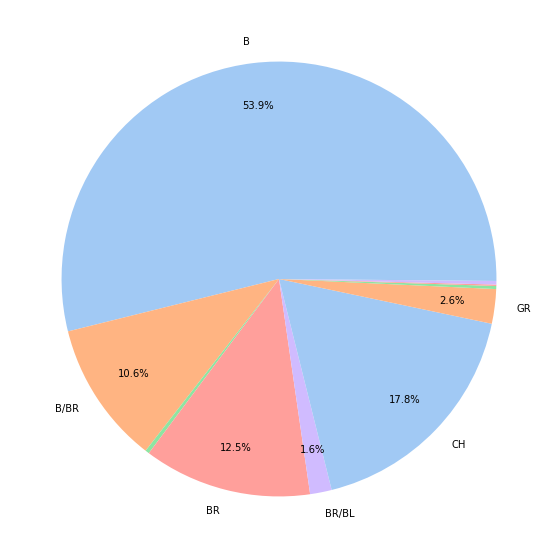

In [7]:
sumdf = df.groupby("colour", as_index = False).sum()
labels = sumdf['colour']
total = sumdf['overall_wins'].sum()

# When the number of wins is less than 1% the number is not displayed on the plot
for i in range(len(labels)):
    count = (sumdf.loc[sumdf['colour'] == labels[i]])['overall_wins']
    percentage = int(count / total * 100)
    if percentage < 1:
        labels[i] = ''

# When the number of wins is less than 1% the label is not not displayed on the plot
def my_fmt(x):
    if x > 1: return '{:.1f}%'.format(x)
    else: return ""

colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(sumdf['overall_wins'], colors = colors, labels=labels, autopct=my_fmt , pctdistance=0.8, labeldistance=1.1)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.show()

In [8]:
# No correlation between coat colour and number of wins observed